## Data Analysis Content
1. [Different method for feature selection](#1)
1. [Filter Method](#2)
1. [Wrapper Method](#3)
1. [Embedded Method](#4)
1. [Three popular technique for feature selection](#5)
    1. [Feature selection with select k-best class from sklearn](#6)
    1. [Univariate feature selection and random forest classification(Feature Importance)](#7)
    1. [feature selection using correlation matrix](#8)
1. [Dimensionality Reduction Techinque](#9)
    1. [Principal Components Analysis (PCA)](#10)
    1. [Linear discriminant analysis (LDA)](#11)
1. [Conclusion](#12)

<a id='1'></a>

### There are basically three methods for feature selection
#### 1)Filter method
#### 2)Wrapper Method
#### 3) EMbedded Method



<a id='2'></a>
### Filter Method
Filter methods are generally used as a preprocessing step. The selection of features is independent of any machine learning algorithms. Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. The correlation is a subjective term here.


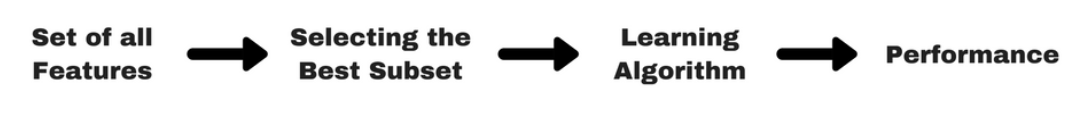

In [3]:
import  matplotlib.pyplot as plt
from IPython.display import display, Image
display(Image(filename='filter method1.png'))

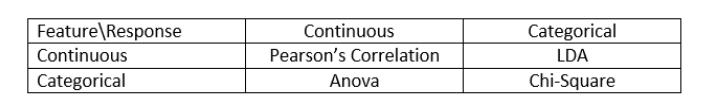

In [4]:

display(Image(filename='filter method-2.png'))

#### Pearson’s Correlation: 
It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1. Pearson’s correlation is given as:

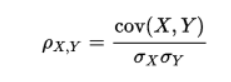

In [5]:
display(Image(filename='pearson_correlation.png'))

##### LDA:
 Linear discriminant analysis is used to find a linear combination of features that characterizes or separates two or more classes (or levels) of a categorical variable.
##### ANOVA:
 ANOVA stands for Analysis of variance. It is similar to LDA except for the fact that it is operated using one or more categorical independent features and one continuous dependent feature. It provides a statistical test of whether the means of several groups are equal or not.
##### Chi-Square: 
It is a is a statistical test applied to the groups of categorical features to evaluate the likelihood of correlation or association between them using their frequency distribution.


<a id='3'></a>
## Wrapper Method
In wrapper methods, we try to use a subset of features and train a model using them. Based on the inferences that we draw from the previous model, we decide to add or remove features from your subset. The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.

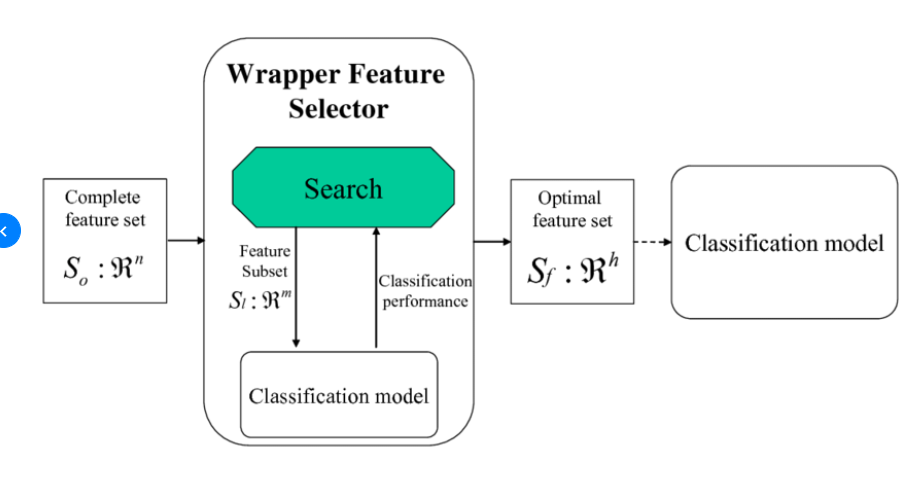

In [6]:
display(Image(filename='wrapper_methos2.png'))

#### Some common examples of wrapper methods are forward feature selection, backward feature elimination, recursive feature elimination, etc.

#### Forward Selection:
Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.
#### Backward Elimination:
 In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.
#### Recursive Feature elimination:
 It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

<a id='4'></a>
## Embedded Methods


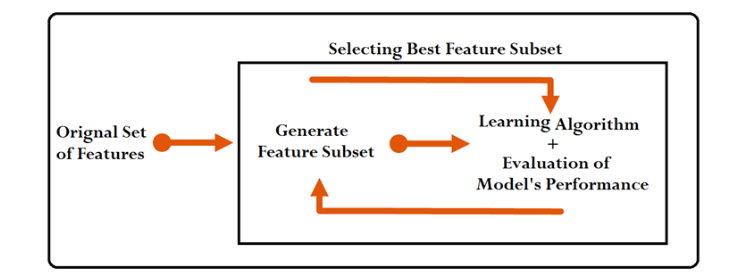

In [7]:
display(Image(filename='embedded method.png'))

Embedded methods combine the qualities’ of filter and wrapper methods. It’s implemented by algorithms that have their own built-in feature selection methods.

#### Some of the most popular examples of these methods are
 LASSO and RIDGE regression which have inbuilt penalization functions to reduce overfitting.


#### Ridge regression 
It performs L2 regularization which adds penalty equivalent to square of the magnitude of coefficients.
Ridge Regression can be used to create a regularized model where constraints are put in the algorithm to penalise the coefficients for being too large thus preventing the model from becoming too complex and causing overfitting. In very simple terms, it adds a penalty α∥w∥ to the equation where w is the vector of model coefficients, ∥⋅∥ is  L2 norm and α is a tunable free parameter. Thus making the whole equation to look like-



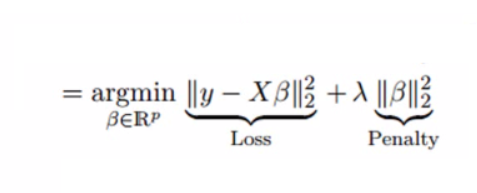

In [8]:
display(Image(filename='ridge regression.png'))

#### Lasso regression
It performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.
Lasso works same as Ridge but performs L1 regularization which adds a penalty α∑ni=1|wi| to the loss function thereby adding penalty equivalent to the absolute value of the magnitude of coefficients rather than the square of the coefficients (used in L2) making the weak features to have zero as coefficients. In a way, by using L1 regularization, Lasso performs an automatic feature selection where the features with 0 as the value of coefficients are dropped. Again the value of lambda is important because if the value is too large then it ends up dropping a lot of variables (by causing the coefficients that are a bit small to become 0) making the model too generalized causing the model to underfit.




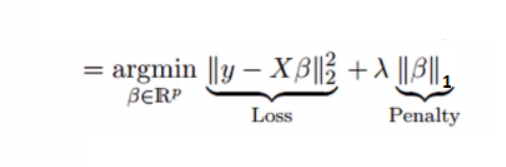

In [9]:
display(Image(filename='lasso1.png'))

##### Other examples of embedded methods are:-
#### Regularized trees
##### Memetic algorithm 
#### Random multinomial logit.


<a id='5'></a>
## Three popular technique for feature selection

#### getting the data ready

In [10]:
import pandas as pd
dataset=pd.read_csv("train.csv")
dataset.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
X=dataset.iloc[:,:20]
y=dataset.iloc[:,-1]
# x=dataset

<a id='6'></a>
## Feature selection with select k-best class from sklearn


In [12]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

**k** will tell the no of features that we want from all features.   
**Score function** will define the criteria/test for selecting best features.   
we can also use **anova**  and **pearson coefficient** for conducting this test

In [13]:
best_features=SelectKBest(score_func=chi2,k=7)
fit=best_features.fit(X,y)

In [14]:
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

lets create a pandas dataframe and visualise the data

In [15]:
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
features_score=pd.concat([df_columns,df_scores],axis=1)
features_score.columns=['features','Score']

features_score.sort_values(by='Score',ascending=False)

,features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


<a id='7'></a>
## Univariate feature selection and random forest classification(Feature Importance)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=10)
model.fit(X,y)
model.feature_importances_
# this is the importnance of each feature

array([0.07655155, 0.00448775, 0.02208288, 0.00560907, 0.01875929,
       0.0044992 , 0.0314976 , 0.01984041, 0.03311925, 0.01903606,
       0.0254318 , 0.05480666, 0.05289497, 0.5490053 , 0.02234709,
       0.02272636, 0.02448953, 0.00373444, 0.00463019, 0.00445061])

In [17]:
feature_imp=pd.DataFrame(model.feature_importances_,index=X.columns,columns=['IMmportance_score'])
feature_imp


,IMmportance_score
battery_power,0.076552
blue,0.004488
clock_speed,0.022083
dual_sim,0.005609
fc,0.018759
four_g,0.004499
int_memory,0.031498
m_dep,0.019840
mobile_wt,0.033119
n_cores,0.019036


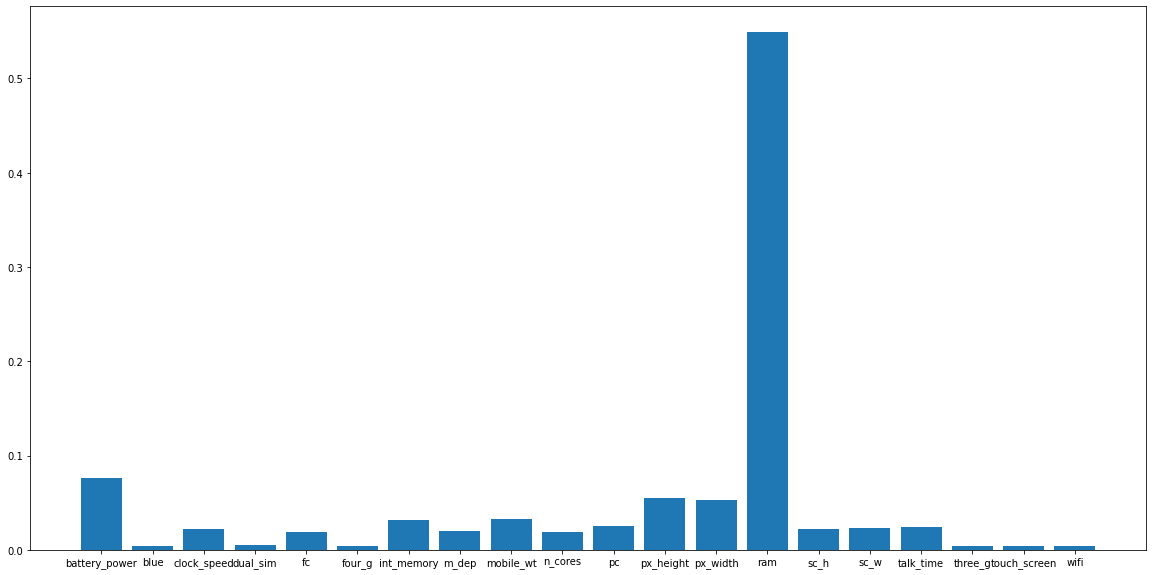

In [18]:
plt.figure(figsize=(20,10))
plt.bar(feature_imp.index,feature_imp['IMmportance_score'])
plt.show()

<a id='8'></a>
## feature selection using correlation matrix

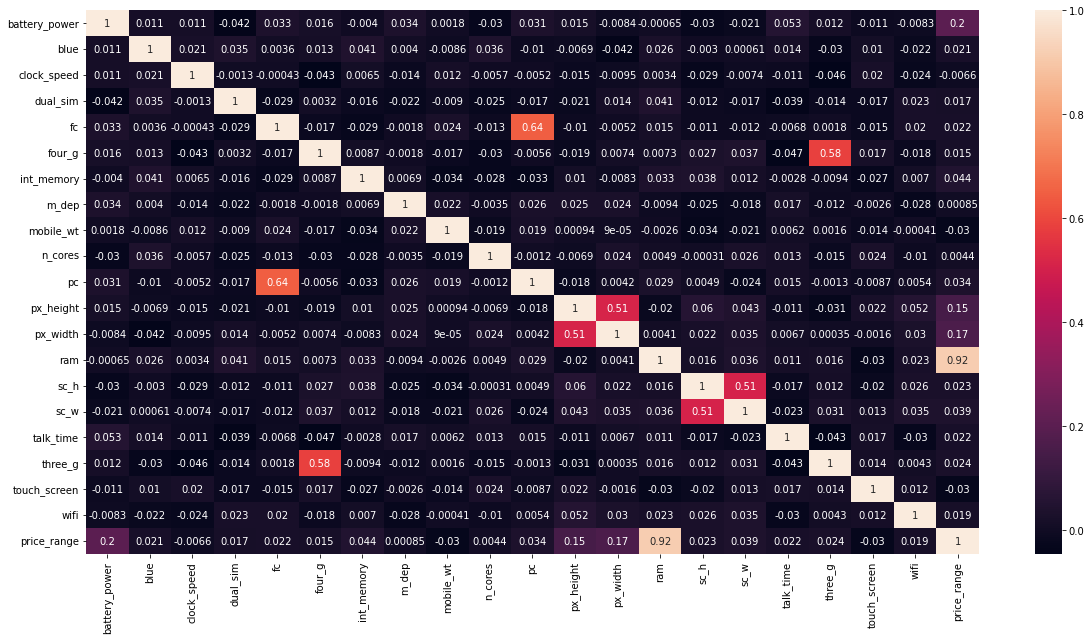

In [19]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()


In [20]:
# we can extract the last columns
corr_=pd.DataFrame(dataset.corr().iloc[:,-1])
corr_.columns=["correlation value"]
corr_

,correlation value
battery_power,0.200723
blue,0.020573
clock_speed,-0.006606
dual_sim,0.017444
fc,0.021998
four_g,0.014772
int_memory,0.044435
m_dep,0.000853
mobile_wt,-0.030302
n_cores,0.004399


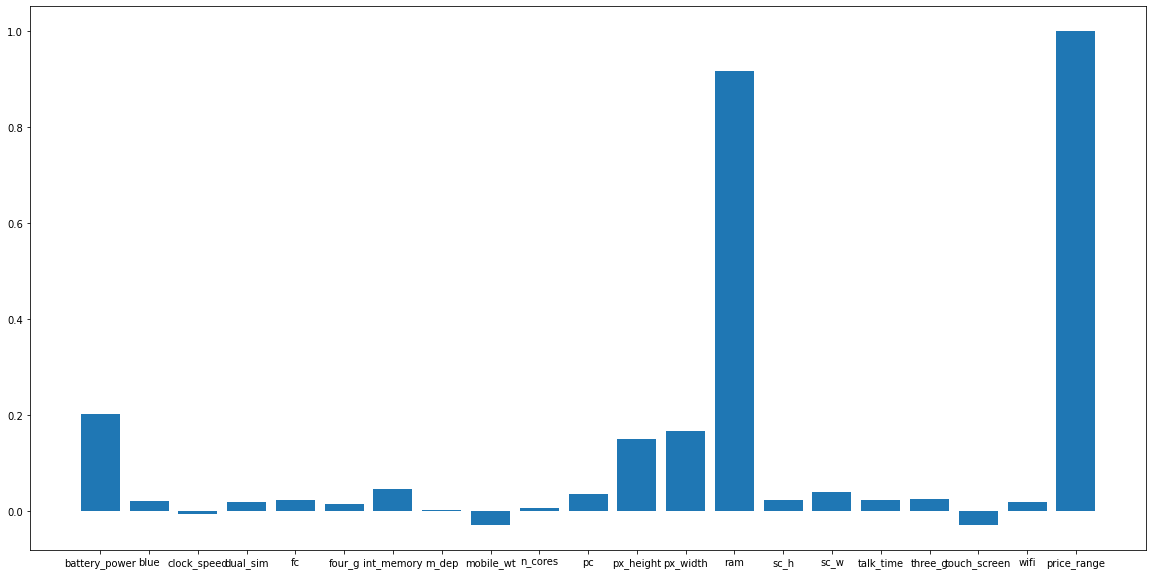

In [21]:
plt.figure(figsize=(20,10))
plt.bar(corr_.index,corr_['correlation value'])
plt.show()
# the graph is going below zero due to negative correlation between few features

<a id='9'></a>
## Dimensionality Reduction Techinque


<a id='10'></a>
### Principal Components Analysis (PCA)
Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.
PCA achieves this goal by projecting data onto a lower-dimensional subspace that retains most of the variance among the data points.

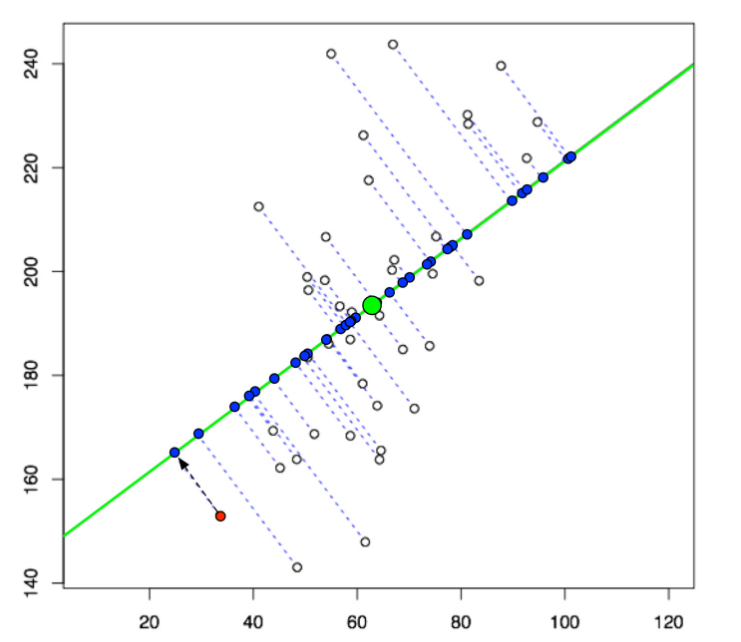

In [22]:
display(Image(filename='pca1.png'))

### pca-scratch_code

In [23]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [24]:
x_train.shape

(60000, 28, 28)

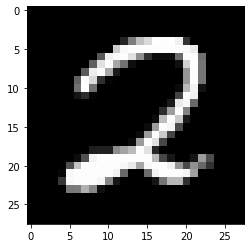

In [25]:

plt.imshow(x_test[35],cmap='gray')

In [26]:
# verifying it using target value
y_test[35]
# reshaping every image  
import numpy as np
x_test=np.reshape(x_test,(10000,784))

#### step-1 Standardization of data(data preprocessing)


In [27]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_test=scale.fit_transform(x_test)

#### Step-2 compute covariance matrix
**covariance**

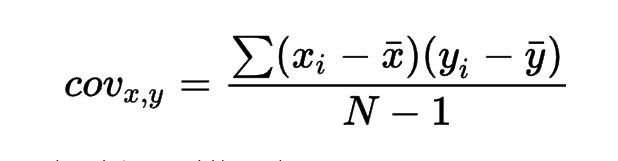

In [28]:
display(Image(filename='covariance.png'))

In [29]:
cov=np.dot(x_test.T,x_test)

#### Step-3 calculation the eigen vectors
**eigen vectors**:-in order to understand the eigen vector we have to first understand the span of a vector
                   (**span**-it is a line passing through the tail and head of a vector)
                   Now eigen vector can be defined as those vector who remain on the same span even after applying any linear transformation to that plane.
      **Example**:- all vector lying along the axis of rotation in a football are considered as eigen vector.Since rotation of ball is a form of linear transfornmation and the span is not changing for those vector.
**eigen vectors basically give us the direction in which our component/new-axis will lie**

                

In [30]:
# method-1 using numpy library
from numpy.linalg import svd
eigen_vector,s,v=svd(cov)
eigen_vector.shape

(784, 784)

In [31]:
# choose only two components/eigen_vector/axis 
pca_axis=eigen_vector[:,:2]
pca_axis.shape

(784, 2)

#### step-4 Projection of Data on new axis

In [32]:
z=np.dot(x_test,pca_axis)
z.shape

(10000, 2)

#### lets visualise the effect of pca

In [33]:
data=np.hstack((z,y_test.reshape(-1,1)))
df=pd.DataFrame(data,columns=['pca1','pca2','target'])
df.head()

,pca1,pca2,target
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


<Figure size 1080x720 with 0 Axes>

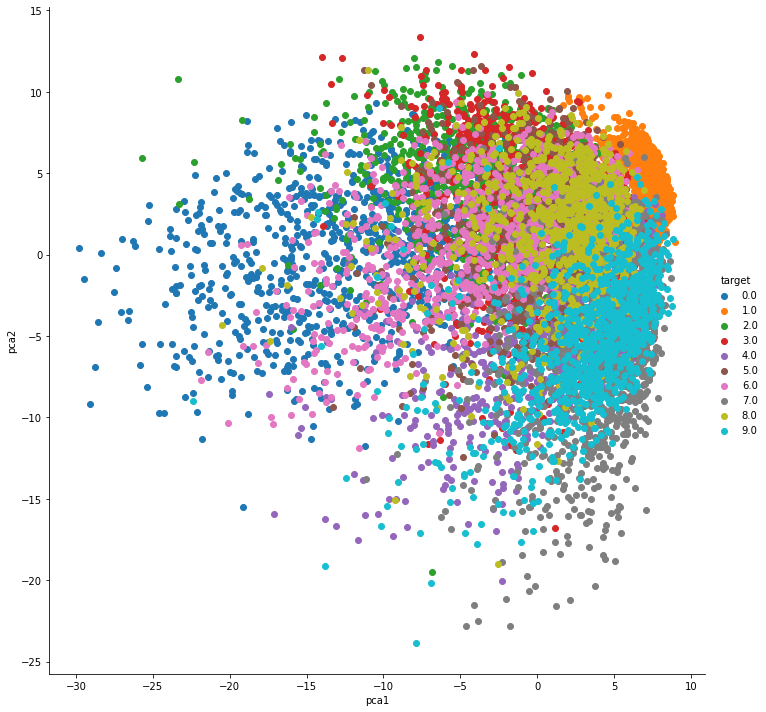

In [34]:
plt.figure(figsize=(15,10))
figre=sns.FacetGrid(df,hue='target',height=10)
figre.map(plt.scatter,"pca1","pca2")
figre.add_legend()
plt.show()

#### method-2 for pca will be via using sklearn library

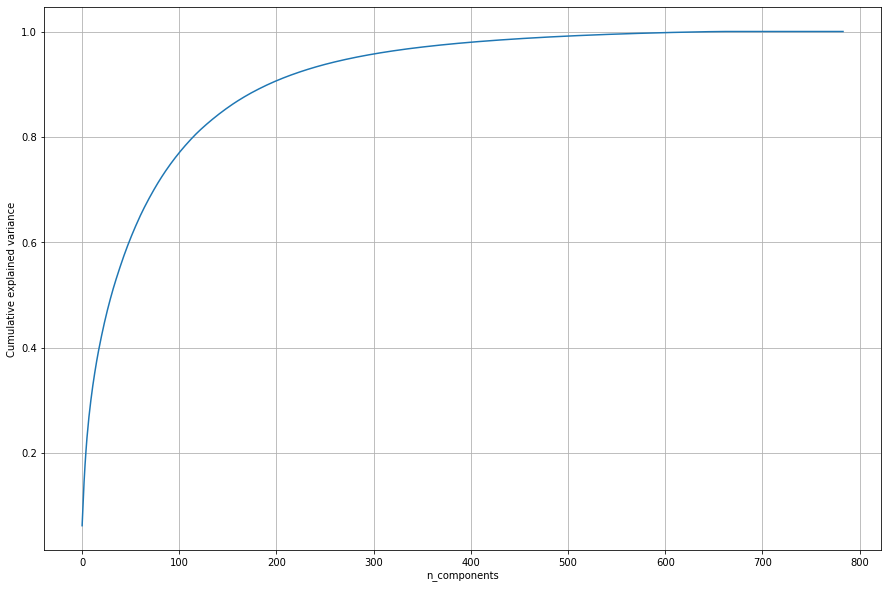

In [35]:
from sklearn.decomposition import PCA
pca=PCA()
z_pca=pca.fit_transform(x_test)
cum_var=np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(15,10))
plt.plot(cum_var)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cumulative explained variance")
plt.show()

<a id='11'></a>
## Linear discriminant analysis (LDA)
First general steps for performing a Linear Discriminant Analysis

1. Compute the d-dimensional mean vector for the different classes from the dataset.

2. Compute the Scatter matrix (in between class and within the class scatter matrix)

3. Sort the Eigen Vector by decrease Eigen Value and choose k eigenvector with the largest eigenvalue to from a d x k dimensional matrix w (where every column represent an eigenvector)

4. Used d * k eigenvector matrix to transform the sample onto the new subspace.

This can be summarized by the matrix multiplication.

Y = X x W (where X is a n * d dimension matrix representing the n samples and you are transformed n * k dimensional samples in the new subspace.

L


In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda=LinearDiscriminantAnalysis(n_components=2)
x_test=lda.fit_transform(x_test,y_test)
x_test.shape
# here we can observe that the dimensions have been reduced to 2


(10000, 2)

In [38]:
type(x_test)

numpy.ndarray

<a id='12'></a>
## Conclusion
Selecting the best feature plays a vital role in machine learning since it help us to reach the optimal number of features.It allow us to avoid the curse of dimensionality.
There are many method for feature selection but the most useful and easily understandable are listed above.
In the next part i will share the different methods of dimensionality reduction techniques. 
